<a href="https://colab.research.google.com/github/jaidh01/ML-CaPsule/blob/Dog-breed-classification/Dog%20Breed%20Classification/end_to_end_dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-End Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using Tensorflow 2.0 adn Tensorflow hub.

## 1. Problem

Identifying the breed of the dog given an image of the dog.

When I am sitting at the cafe and I take a photo of a dog, and I want to want the breed of the dog it is.

## 2. Data

The data we're using is from Kaggle dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features.

Some information about the data.
* We are dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are 10,000+ images in the training set.
 (these images have labels).
* There are around 10,000+ images in test set.
 (these images have no labels, because we'll want to predict them).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip the uploaded data into Google Drive.
#!unzip "/content/drive/MyDrive/dog_vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog_vision/"

### Get our workspace ready

* Import Tensorflow 2.x ✅
* Import Tensorflow Hub ✅
* Make sure we're using a GPU ✅

In [ ]:
# Import all necessary tools.
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("TF hub version:", hub.__version__)

# Check for GPU availability
print("GPU","available :)" if tf.config.list_physical_devices('GPU') else "not available :(")

TF version: 2.17.0
TF hub version: 0.16.1
GPU available :)


## Geeting our data ready (Turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into tensor (numerical repersentation).


Let's start by accessing our data and checking out the labels.

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dog_vision/labels.csv")
#description_csv = pd.read_csv("/content/dog_breed_complete_details.csv", encoding='latin-1')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


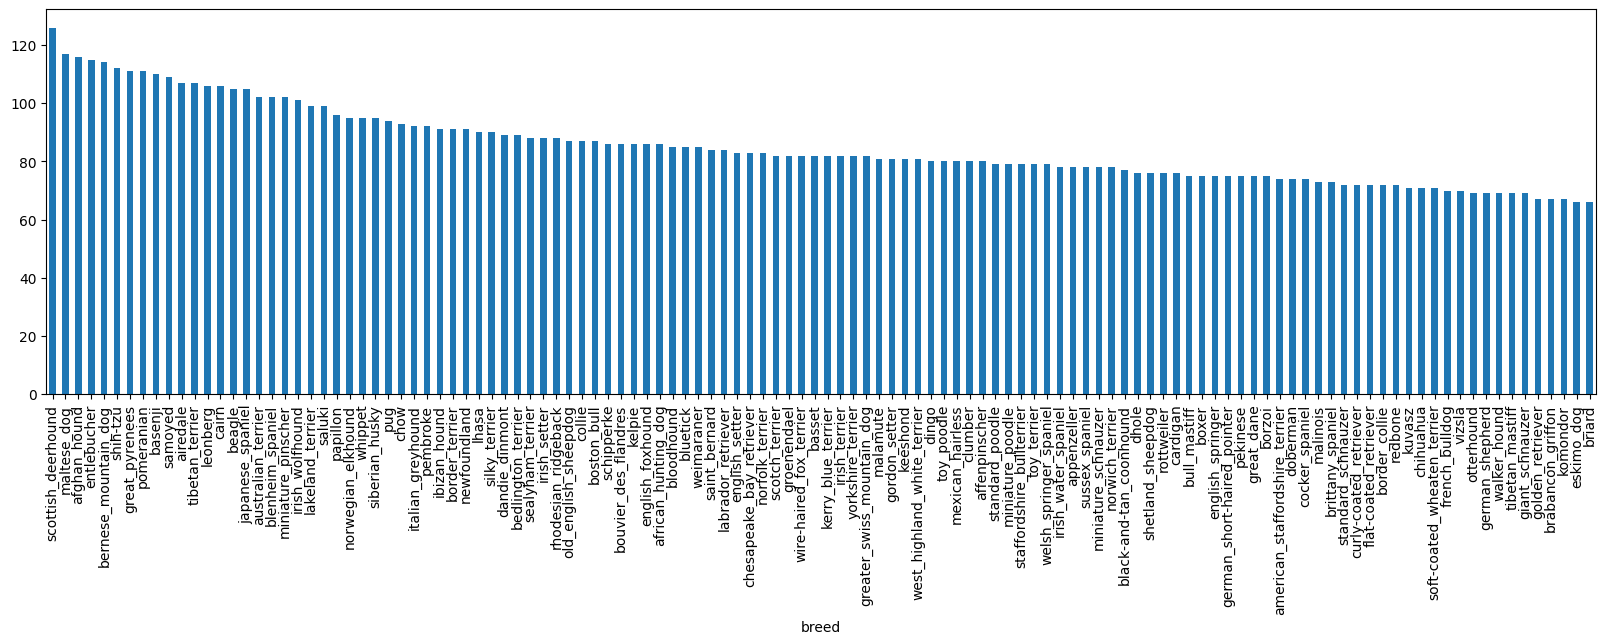

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize = (20,5));

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

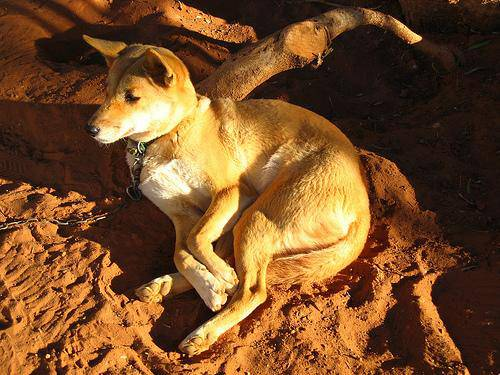

In [ ]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")


# Getting images and their labels.

Let's get a list of all of our image file pathnames.

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create pathnames from Image Id's.
filename = ["/content/drive/MyDrive/dog_vision/train/"+ fname for fname in labels_csv["id"] + ".jpg"]

# Check first 10
filename[:10]

['/content/drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check wheather the number of filename matches the number of images.
import os
if len(os.listdir("/content/drive/MyDrive/dog_vision/train/")) == len(filename):
  print("Filenames match actual amount of files!!! Go ahead")
else:
  print("Filenames do not match the actual amount of files!!! check the targeted dir.")

Filenames match actual amount of files!!! Go ahead


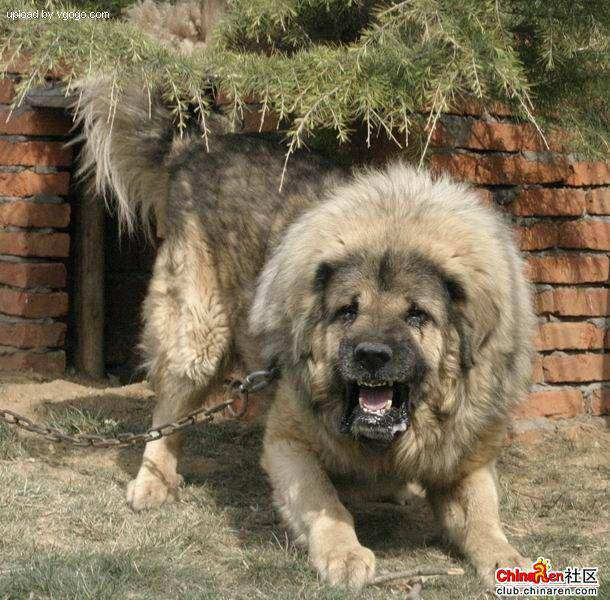

In [ ]:
# One more check
Image(filename[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(lables) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# check if number of labels is equal to number of filename
if len(labels) == len(filename):
  print("Labels matches filenames")
else:
  print("Labels do not match filenames")

Labels matches filenames


In [ ]:
# Find the unique label values
unique_breed = np.unique(labels)
len(unique_breed)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(labels)

10222

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breed for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# EXample: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breed == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where labels occur in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[9])
print(boolean_labels[9].astype(int))

scottish_deerhound
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Creating our own Validation Set

Since the dataset from Kaggle dosen't come with a validation set, so we're going to create our own.

In [ ]:
# Setup x & y variables
x = filename
y = boolean_labels

In [ ]:
len(filename)

10222

We're going to start off experimenting with ~1000 images and increase it as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 # @param {type:"slider", min: 1000, max: 10000, step: 1000}

In [ ]:
# Let's split our dataset into train and validation set
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42) # random_state is same as np.random.seed(42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
x_train[:5], y_train[:2]

(['/content/drive/MyDrive/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/dog_vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/dog_vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/dog_vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

# Preprocessing images ( Turning images into Tensors )

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input.
2. Use tensorflow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into tensors.
4. Resize the `image` to be a shape (224, 224).
5. Return the modified `image`

Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we've seen what's an image looks like as a Tensor, let's make a function to preprocess them.

1. Take an image filepath as input. ✅
2. Use tensorflow to read the file and save it to a variable, `image` ✅
3. Turn our `image` (a jpg) into tensors. ✅
4. Normalize our `image`(convert colour channels from 0-255 to 0-1). ✅
4. Resize the `image` to be a shape (224, 224). ✅
5. Return the modified `image`. ✅

In [ ]:
# Define Image size
IMG_SIZE = 224

# Create a function to preprocessing image
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath as input and turns the image into a tensor.

  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpg image into a numerical tensor with 3 color channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels = 3)

  # Convert the color channel from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (244, 244)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go...they all might not fit into the memory.

So that's why we do about 32 (this is a batch size) images at a time (you can manually adjust the batch size if needed).

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which looks like this:
`(image, label)`.

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image filepath and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got our way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (x & y) into batches!!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label(y) pairs.
  Shuffles the data if it's training data but dosen't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test data, we probably don't have labels.
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths no label
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it.
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images.
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches.
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))


## Visualizing Data Batches

Our Data is now in Batches, however, these can be a little hard to understand/ comprehend, let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing 25 images in a data batch.
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breed[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

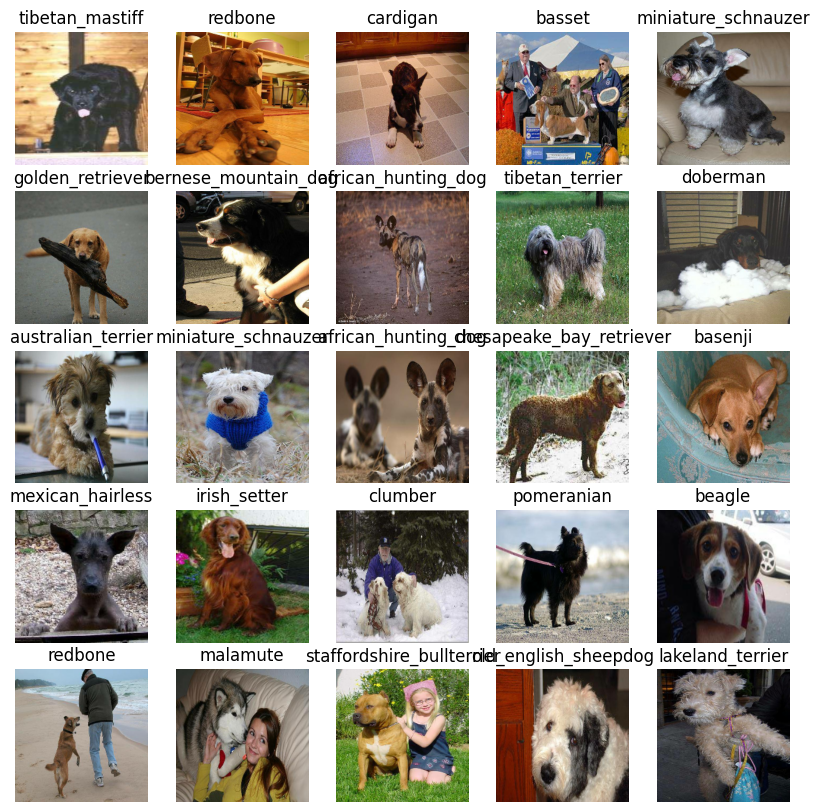

In [ ]:
# Now let's viseualize the data in training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

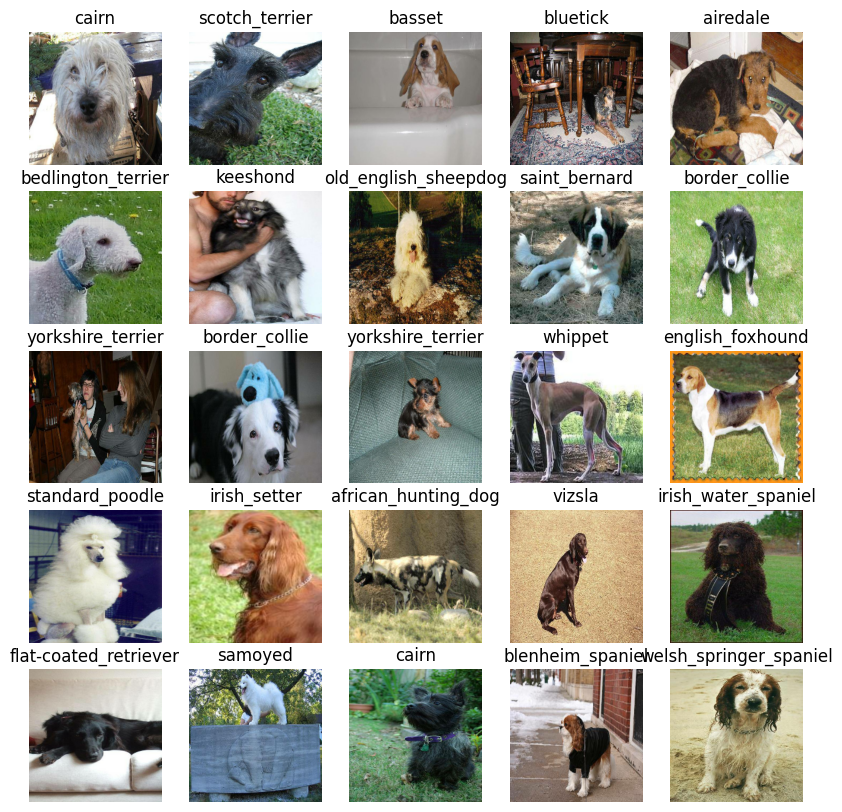

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are few things we need to define:
* The input shape (our images shape, in the form of tensors) to our model.
* The output shape (image labels, in the form of tensors) of our model.
* The URL of the model we want to use from tensorflow hub:- "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breed)

# Setup model URL from Tensorflow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model..!!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in a sequential manner.
* Complies the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

In [ ]:
!pip install tensorflow_hub

In [ ]:
INPUT_SHAPE

[None, 224, 224, 3]

In [ ]:
# Create model function
def create_model(input_shape=(224, 224, 3), output_shape=120, model_url='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'):
    print("Building a model with", model_url)

    # Define the input layer using Input
    inputs = tf.keras.Input(shape=input_shape, dtype=tf.float32)  # Explicitly set dtype to float32

    # Load the feature extractor from TensorFlow Hub
    # Wrap the hub.KerasLayer in a Lambda layer to handle symbolic inputs and set output shape
    feature_extractor = tf.keras.layers.Lambda(
        lambda x: hub.KerasLayer(model_url, trainable=False)(x),
        output_shape=(1280,)  # MobileNetV2's feature vector has 1280 dimensions
    )(inputs)

    # Flatten the output from the feature extractor
    flatten = tf.keras.layers.Flatten()(feature_extractor)

    # Add a dense output layer with the correct number of classes
    outputs = tf.keras.layers.Dense(units=output_shape, activation="softmax")(flatten)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model


In [ ]:
model = create_model()
model.summary()

Building a model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │         153,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,720 (600.47 KB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 0 (0.00 B)

## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save the progress, check its progress or stop training early if it a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.


### TensorBoard Callback

To setup TensorBoard callback, we need to do 3 things:
1. Load the tensorboard notebook extension.✅
2. Create a tensorboard callback which is able to save logs to a directory and pass it to our model's `fit()` function. ✅
3. Visualize our models training logs with the `%tensorboard` magic function.

In [ ]:
# Load tensorboard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build tensorboard callback
def create_tensorboard_callback():
  # Create a log dir for storing Tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/dog_vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create a early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

### Training a model (on subset of data)

Our first model is only going to be trained on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still runing on a GPU
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


Let's create a function to train our model.

* Create a model using `create_model()`
* Setup a Tensorboard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained model.
  """
  # Create a model
  model = create_model()

  # Create a new tensorboard session everytime we train a model.
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Returning the fitted model
  return model

In [ ]:
model = train_model()
model.save("/content/drive/MyDrive/dog_vision/dog_breed_classification01.keras")

Building a model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 406s 16s/step - accuracy: 0.0596 - loss: 4.7590 - val_accuracy: 0.2300 - val_loss: 3.4221
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 197ms/step - accuracy: 0.6339 - loss: 2.0886 - val_accuracy: 0.4950 - val_loss: 2.1797
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9177 - loss: 0.8561 - val_accuracy: 0.6350 - val_loss: 1.7008
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9845 - loss: 0.4221 - val_accuracy: 0.6450 - val_loss: 1.4864
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.9856 - loss: 0.2628 - val_accuracy: 0.6800 - val_loss: 1.3906
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.9984 - loss: 0.1822 - val_accuracy: 0.6900 - val_loss: 1.3198
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.9998 - loss: 0.1247 - val_accuracy: 0.6900 - val_loss: 1.2856
Epoch 8

### Checking the tensorboard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directly we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/dog_vision/logs

### Making and evaluating  predictions using a trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 907ms/step


array([[2.18515005e-03, 2.88000330e-03, 3.92866466e-04, ...,
        6.21707586e-05, 1.71934880e-04, 9.36122891e-03],
       [4.88877343e-03, 1.09076938e-02, 1.36502106e-02, ...,
        2.18425950e-04, 2.47396599e-03, 9.41427497e-05],
       [1.21363219e-05, 1.85688536e-04, 1.11197907e-04, ...,
        1.06900465e-04, 2.44085895e-05, 1.47309015e-03],
       ...,
       [6.02421096e-05, 2.13907435e-04, 1.17526921e-04, ...,
        4.88435471e-05, 1.91504718e-04, 2.04654352e-04],
       [1.15450712e-04, 5.21272195e-05, 8.40594948e-05, ...,
        8.51110872e-06, 1.94755467e-05, 1.91626465e-03],
       [2.20294402e-04, 2.58042801e-05, 2.35697182e-04, ...,
        2.92890333e-03, 9.85463266e-04, 4.61691438e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
len(unique_breed)

120

In [ ]:
# First prediction
index=0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breed[np.argmax(predictions[index])]}")

[2.18515005e-03 2.88000330e-03 3.92866466e-04 1.34545873e-04
 9.47500579e-04 1.81593190e-04 1.20218610e-02 1.29087374e-03
 2.93863413e-04 7.01179888e-05 3.87269509e-04 2.15382723e-04
 5.39023767e-06 7.95824017e-05 2.55994644e-04 6.58404169e-05
 3.97923177e-05 3.24777737e-02 7.24559723e-05 2.31730650e-04
 4.89081722e-03 9.57503507e-04 4.24050842e-04 3.70013528e-03
 1.77572674e-05 3.32391850e-04 1.33796066e-01 1.91253945e-04
 2.02833628e-03 1.57466577e-03 3.04167363e-04 1.21330013e-02
 5.58565429e-04 1.39867669e-04 7.49539904e-05 3.75515521e-02
 2.43754956e-04 6.42472762e-04 8.10720448e-05 9.50155008e-05
 4.67190519e-04 5.14021085e-05 3.31075898e-05 1.90115388e-04
 3.29164577e-05 8.73330631e-04 9.33632327e-06 2.44732457e-03
 8.93213437e-04 2.39770001e-04 5.63415488e-05 5.09433507e-04
 8.48258473e-03 1.48148582e-04 1.28934873e-04 4.63193974e-05
 9.87955937e-05 2.23160051e-02 9.60762045e-05 4.61842194e-02
 5.65625203e-04 1.11456095e-04 1.34346541e-03 5.11594917e-05
 2.63310241e-04 8.791459

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is made on!

**Note:** Prediction prababilities are also known as confidence levels

In [ ]:
# Turn prediction probabilities into their respective labels. (eaiser to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities.
pred_label = get_pred_label(predictions[0])
pred_label

'lhasa'

Now since our validation dataset is still in a batch dataset, we'll have to unbatchify to make predictions on the validation images and then compare those predictions to the validation labels(truth labels).

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  images=[]
  labels=[]
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])

  return images, labels

# Check the above function
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get:

* Prediction labels
* Validation labels(truth labels)
* Validation images

Let's make some functions to make these all a bit more visualize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert a prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = color)

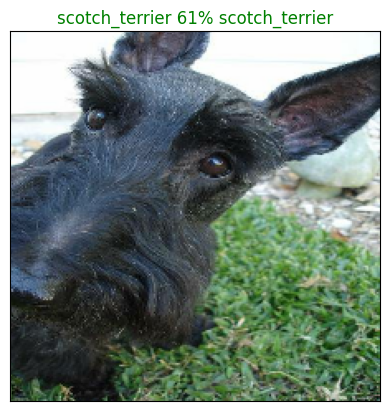

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer.
* Find the prediction using `get_pred_label()`
* Find the top 10:
    * Prediction probabilities indexes ✅
    * Prediction probabilities values ✅
    * Prediction labels ✅
* Plot the top 10 prediction probability values and labels, colouring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=10)

Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.

In [ ]:
# Let's check out a few predictions and their different values.
i_multiplizer = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplizer)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplizer)

plt.tight_layout(h_pad=1.0)
plt.show()

### Saving and loading our trained model

In [ ]:
# Create a function to save our model
def save_model(model, suffix=None):
  """
  Saves a given model in a module directory and appends a suffix(string.
  """
  # Create a model directory with pathname with current time.
  modeldir = os.path.join("/content/drive/MyDrive/dog_vision/models",
                          datetime.datetime.now().strftime("%Y%m%d - %H%M%s"))
  model_path = modeldir + "-" + suffix + ".keras" # Save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path, custom_objects=None):
  """
  Loads a saved model from the specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects=custom_objects,
                                      safe_mode=False)
  return model

Now we've got functions to save and load a trained model, let's make sure they work!!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
# Load a trained model
loaded_model = load_model("/content/drive/MyDrive/dog_vision/dog_breed_classification01.keras",
                          custom_objects={'KerasLayer': hub.KerasLayer}  # Register KerasLayer with hub
)

Loading saved model from: /content/drive/MyDrive/dog_vision/dog_breed_classification01.keras


In [ ]:
# Evaluate a pre-saved model
model.evaluate(val_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7214 - loss: 1.1418


[1.2036513090133667, 0.7149999737739563]

## Training a bigger dog model 🐶(on the full dataset)

In [ ]:
len(x), len(y)

In [ ]:
x[:10]

In [ ]:
y[:10]

In [ ]:
# Create a data batch with the full data
full_data = create_data_batches( x, y)

In [ ]:
full_data

In [ ]:
# Create a model for full model
full_model = create_model()

In [ ]:
# Create a full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix="full_dataset_model-mobilenet-v2-Adam")

In [ ]:
# Remove the 'safe_mode' parameter
loaded_full_model = load_model("/content/drive/MyDrive/dog_vision/models/20241015 - 14261729002365-full_dataset_model-mobilenet-v2-Adam.keras")

### Make predictions on the test data

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get in the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and cover them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames. ✅
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True`(since the test data dosen't have labels). ✅
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames.
test_path = "/content/drive/MyDrive/dog_vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
test_data

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose = 1)

In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("/content/drive/MyDrive/dog_vision/preds_array.csv", test_predictions, delimiter = ",")

In [ ]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("/content/drive/MyDrive/dog_vision/preds_array.csv", delimiter = ",")

## Preparing test dataset predictions for Kaggle

Looking at the kaggle sample submission, we find that it wants our model prediction probability outputs in a DataFrame with an ID and a column for each differnt dog breed.

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to kaggle.

In [ ]:
["id"] + list(unique_breed)

In [ ]:
# Create a pandas DataFrame with empty columns.
preds_df = pd.DataFrame(columns=["id"] + list(unique_breed ))
preds_df.head()

In [ ]:
# Append the test image ID's to prediction DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breed)] = test_predictions
preds_df.head()

In [ ]:
# Save our predictions dataframe to .csv file
preds_df.to_csv("/content/drive/MyDrive/dog_vision/full_model_predictions_submission_mobilenetV2.csv",
                index = False)

# Make predictions on coustom image.

To make predictions on coustom image, we'll:
* Get the filepaths
* Change the filepaths into data batches (as our model is trained on batches) using `create_data_batches()` and Since our coustom data don't have labels, so we set the `test_data` parameter to `True`.
* Pass the coustom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to prediction labels.
* Conmpare the predicted labels to the coustom images.

In [ ]:
import os

In [ ]:
# Get coustom image filepaths
custom_path = "/content/drive/MyDrive/dog_vision/custom_dog_images/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_path

In [ ]:
# Turn custom data into batch datasets
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

In [ ]:
# Make prediction on the custom images.
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels...)
custom_images = []
# Loop through unbatch data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)